In [1]:
import numpy as np
from scipy.special import fresnel, erf
import matplotlib.pyplot as plt

In [5]:
def get_SC(x):
    ip = 1j + 1
    im = 1 - 1j
    arg_p = ip * np.sqrt(np.pi) * x * 0.5
    arg_m = im * np.sqrt(np.pi) * x * 0.5
    S = (ip/4) * (erf(arg_p) - 1j * erf(arg_m))
    C = (im/4) * (erf(arg_p) + 1j * erf(arg_m))
    return S, C

In [6]:
fresnel(3)

(0.49631299896737496, 0.6057207892976857)

In [7]:
get_SC(3)

((0.49631299896737496+0j), (0.6057207892976858+0j))

In [11]:
x = np.linspace(0, 10, 1000)
scS, scC = fresnel(x)
S, C = get_SC(1j*x)

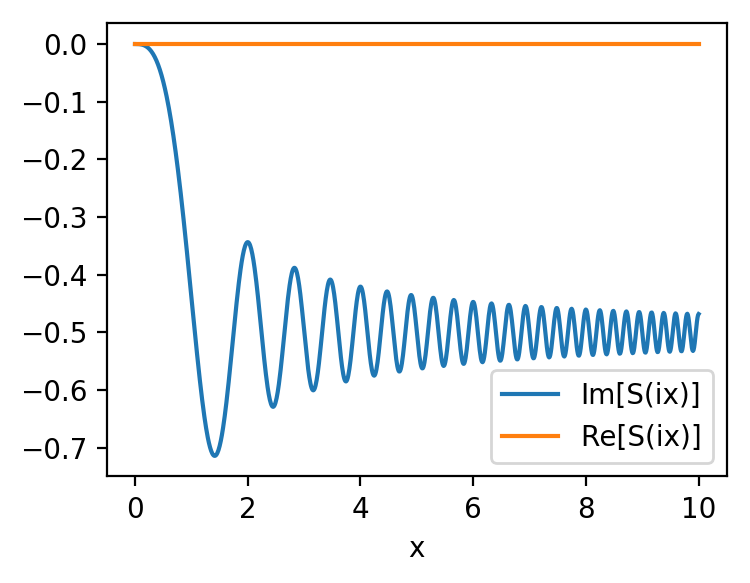

In [13]:
#%matplotlib notebook
fig = plt.figure(figsize = (4, 3), dpi = 200)
ax  = fig.gca()
ax.set_xlabel("x")
ax.plot(x, np.imag(S), label = 'Im[S(ix)]')
ax.plot(x, np.real(S), label = 'Re[S(ix)]')
ax.legend()
plt.show()

In [13]:
S

array([0.00000000e+00+0.j, 3.43534163e-04+0.j, 2.74796678e-03+0.j,
       9.26990620e-03+0.j, 2.19445326e-02+0.j, 4.27429328e-02+0.j,
       7.34918995e-02+0.j, 1.15746019e-01+0.j, 1.70605787e-01+0.j,
       2.38482599e-01+0.j, 3.18822737e-01+0.j, 4.09818505e-01+0.j,
       5.08154828e-01+0.j, 6.08861601e-01+0.j, 7.05360884e-01+0.j,
       7.89805698e-01+0.j, 8.53793152e-01+0.j, 8.89487639e-01+0.j,
       8.91101674e-01+0.j, 8.56553524e-01+0.j, 7.88969275e-01+0.j,
       6.97561698e-01+0.j, 5.97360959e-01+0.j, 5.07367246e-01+0.j,
       4.47003718e-01+0.j, 4.31278697e-01+0.j, 4.65730231e-01+0.j,
       5.42811534e-01+0.j, 6.41566124e-01+0.j, 7.31913888e-01+0.j,
       7.83470291e-01+0.j, 7.76772705e-01+0.j, 7.12812656e-01+0.j,
       6.15985891e-01+0.j, 5.27036111e-01+0.j, 4.86570196e-01+0.j,
       5.15096216e-01+0.j, 5.99575122e-01+0.j, 6.95938378e-01+0.j,
       7.50183773e-01+0.j, 7.29484806e-01+0.j, 6.45413174e-01+0.j,
       5.51607538e-01+0.j, 5.11744322e-01+0.j, 5.54952313e-01+